# Perceptron training project
The aim of this project is to create a single perceptron from scratch and implement its weight learning with backpropagation. The perceptron is applied to two datasets from UCI Machine Learning Repository - [Iris](https://archive.ics.uci.edu/dataset/53/iris) and [Breast Cancer](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original).

Since the Iris dataset contains three classes and perceptron is used only for classifying objects into two classes, only 'Iris versicolor' and 'Iris virginica' classes were used.

In this project the use of sigmoid and step activation functions is used. Classification accuracy and loss is evaluated over the number of epochs.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Reading the data
iris = pd.read_excel("iris.xlsx")
cancer = pd.read_excel("breast-cancer.xlsx")

In [3]:
# Changing class attribute values to 0 and 1.
# For breast cancer dataset 0 means benign, 1 - malignant
# For iris dataset 0 corresponds to class versicolor, 1 to virginica
cancer['Column11'] = cancer['Column11'].replace([2, 4], [0, 1])
iris['Column5'] = iris['Column5'].replace(['Iris-versicolor', 'Iris-virginica'], [0, 1])

In [ ]:
# Splitting datasets into train and validation with a ratio 80:20
np.random.seed(5)
iris_train, iris_test = train_test_split(iris, test_size = 0.2)
iris_train_x = iris_train.iloc[:, 0:4]
iris_train_y = iris_train.iloc[:, 4]
iris_test_x = iris_test.iloc[:, 0:4]
iris_test_y = iris_test.iloc[:, 4]

cancer_train, cancer_test = train_test_split(cancer, test_size = 0.2)
cancer_train_x = cancer_train.iloc[:, 0:9]
cancer_train_y = cancer_train.iloc[:, 9]
cancer_test_x = cancer_test.iloc[:, 0:9]
cancer_test_y = cancer_test.iloc[:, 9]

In [5]:
# Activation functions and sum of weights

def step(a):
    """
    This function represents step activation function
    """
    if a >= 0:
        return 1
    else:
        return 0
    
def sigmoid(a):
    """
    This function encodes a sigmoid activation function
    """
    return (1 / (1 + np.exp(-a)))

def sum_of_weights(inputs, weights):
    """
    This function calculates weighted sum of inputs
    """
    inputs = np.array(inputs)
    weights = np.array(weights)
    a = weights[0] + sum(weights[1:] * inputs)
    return a

In [6]:
# Accuracy and loss functions

def accuracy(output, target):
    """
    This represents the accuracy of classification
    """
    output = np.around(output)
    correct = (np.array(output) == np.array(target)).sum()
    acc = correct / len(target)
    return acc

def loss(calculated_values, true_values):
    """
    This function represents the loss as the sum of squared loss for each record
    """
    return sum((np.array(calculated_values) - np.array(true_values))**2)

In [10]:
# Perceptron training

def train(inputs, targets, learning_rate, number_of_epochs, activation_function = ("step", "sigmoid"), seed=1):
    """
    This function builds and trains the perceptron
    Arguments: 
        inputs - input values, 
        targets - class labels, 
        learning_rate, 
        number_of_epochs, 
        activation_function - step or sigmoid,
        seed - random seed to ensure the reproducability of results
    
    Function returns (for each epoch): 
        weights, 
        output values, 
        loss,
        accuaracy
    """
    outputs = [None] * len(targets)
    losses = []
    accuracies = []
    i = 1
    np.random.seed(seed)
    weights = np.random.uniform(-1, 1, len(inputs.columns)+1)
    while i <= number_of_epochs:
        for j in range(len(inputs)):
            a = sum_of_weights(inputs.iloc[j], weights)
            if activation_function == "step":
                outputs[j] = step(a)
            elif activation_function == "sigmoid":
                outputs[j] = sigmoid(a)
            if outputs[j] != targets.iloc[j]:
                old_weights = weights
                weights[0] = old_weights[0] + learning_rate * (targets.iloc[j] - outputs[j])
                for k in range(1, (len(inputs.columns)+1)):
                    weights[k] = old_weights[k] + learning_rate * (targets.iloc[j] - outputs[j]) * inputs.iloc[j][k-1]
        losses.append(loss(outputs, targets))
        accuracies.append(accuracy(outputs, targets))
        i += 1
    return weights, outputs, losses, accuracies

In [11]:
# Perceptron testing function

def test(inputs, weights, activation_function = ("step", "sigmoid")):
    """
    This function is made for making predictions for testing dataset using pretrained weights
    Arguments: 
        inputs, 
        weights - that were returned after training the perceptron, 
        activtion_function - step or sigmoid
    Function returns the output values of the model
    """
    output = [None] * len(inputs)
    for i in range(len(inputs)):
        a = sum_of_weights(inputs.iloc[i], weights)
        if activation_function == "step":
            output[i] = step(a)
        elif activation_function == "sigmoid":
            output[i] = sigmoid(a)
    return output

## Training perceptron on Iris dataset

In [12]:
# Training with sigmoid function
iris_weights, iris_result, iris_loss, iris_acc = train(iris_train_x, iris_train_y, 0.1, 50, "sigmoid")
print(max(iris_acc))
print(iris_acc.index(max(iris_acc)))
print(min(iris_loss))
print(iris_loss.index(min(iris_loss)))

0.9625
40
3.4640273246107616
46


Best accuracy was achieved after 41 epochs were more than 96 % of the training dataset was classified correctly. The lowest loss was achieved after 47 epochs. However accuracy is more important when performing a classification task.

In [14]:
# Using step function
iris_weights_b, iris_result_b, iris_loss_b, iris_acc_b = train(iris_train_x, iris_train_y, 0.1, 50, "step")
print(max(iris_acc_b))
print(iris_acc_b.index(max(iris_acc_b)))
print(min(iris_loss_b))
print(iris_loss_b.index(min(iris_loss_b)))

0.975
31
2
31


When using step function, the highest accuracy was 97.5 % and it was observed after 32 epochs.

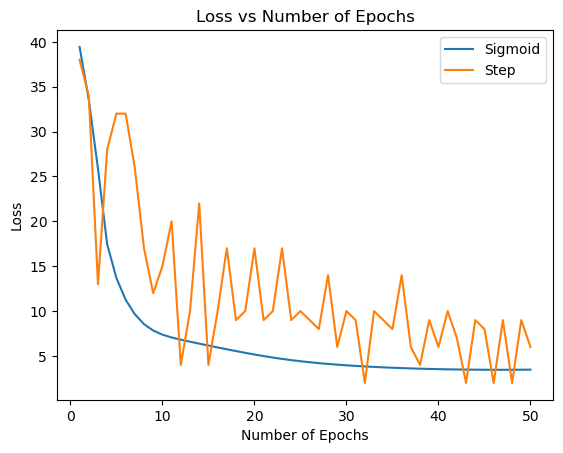

In [15]:
# Plotting the loss vs. number of epochs graph for different activation functions
plt.plot(np.arange(1, len(iris_loss)+1), iris_loss, label = "Sigmoid")
plt.plot(np.arange(1, len(iris_loss_b)+1), iris_loss_b, label = "Step")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Number of Epochs")
plt.legend()
plt.show()

As can be seen from the graph, the lowest loss was achieved using a step function, however sigmoid activation function produced much more stable classification result, where the loss value was steadily decreasing over number of epochs. The training of the model with sigmoid activation function could be ended after 25-30 epochs as the loss is not improving by much going further.

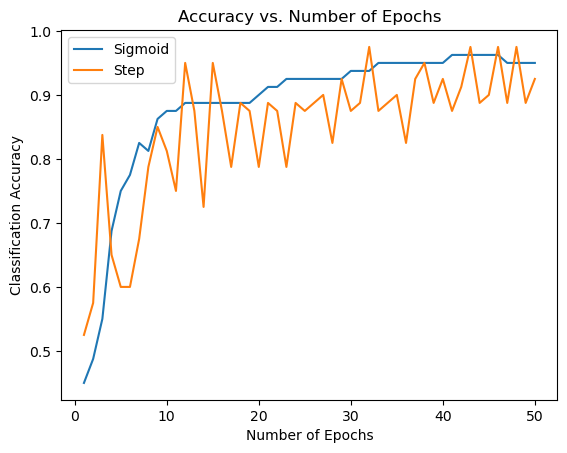

In [16]:
# Accuracy plot
plt.plot(np.arange(1, len(iris_acc)+1), iris_acc, label = "Sigmoid")
plt.plot(np.arange(1, len(iris_acc_b)+1), iris_acc_b, label = "Step")
plt.xlabel("Number of Epochs")
plt.ylabel("Classification Accuracy")
plt.title("Accuracy vs. Number of Epochs")
plt.legend()
plt.show()

The accuracy graph shows same tendencies as loss graph (as is expected since lower loss means better accuracy). Again using the sigmoid function produced much more stable results.

## Training on Breast Cancer dataset

In [17]:
# Using sigmoid funciton
cancer_weights, cancer_result, cancer_loss, cancer_acc = train(cancer_train_x, cancer_train_y, 0.1, 50, "sigmoid")
print(max(cancer_acc))
print(cancer_acc.index(max(cancer_acc)))
print(min(cancer_loss))
print(cancer_loss.index(min(cancer_loss)))

0.9652014652014652
46
17.6073064037768
49


Highest accuracy for training perceptron was with a sigmoid activation function was achieved after 47 epochs where 96.5 % of the training dataset was classified correctly.

In [18]:
# Using step function
cancer_weights_b, cancer_result_b, cancer_loss_b, cancer_acc_b = train(cancer_train_x, cancer_train_y, 0.1, 50, "step")
print(max(cancer_acc_b))
print(cancer_acc_b.index(max(cancer_acc_b)))
print(min(cancer_loss_b))
print(cancer_loss_b.index(min(cancer_loss_b)))

0.9652014652014652
29
19
29


Using step function produced the same best accuracy value, however it was achieved earlier compared to sigmoid function (after 30 epochs).

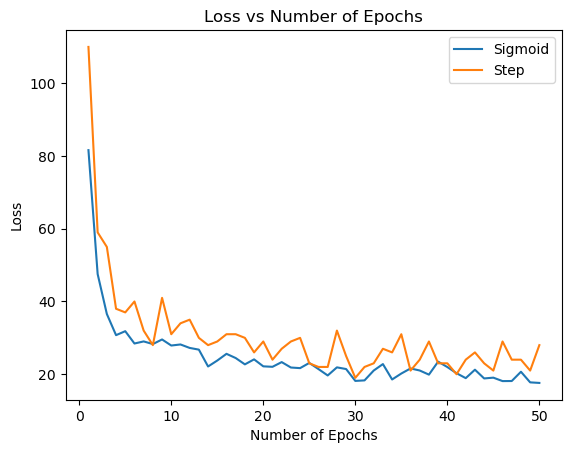

In [20]:
# Loss vs epochs
plt.plot(np.arange(1, len(cancer_loss)+1), cancer_loss, label = "Sigmoid")
plt.plot(np.arange(1, len(cancer_loss_b)+1), cancer_loss_b, label = "Step")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Number of Epochs")
plt.legend()
plt.show()

Again the results produced by using a sigmoid activation function are a little more stable in terms of loss than using step function. However the difference here is not that big compared to the Iris datset.

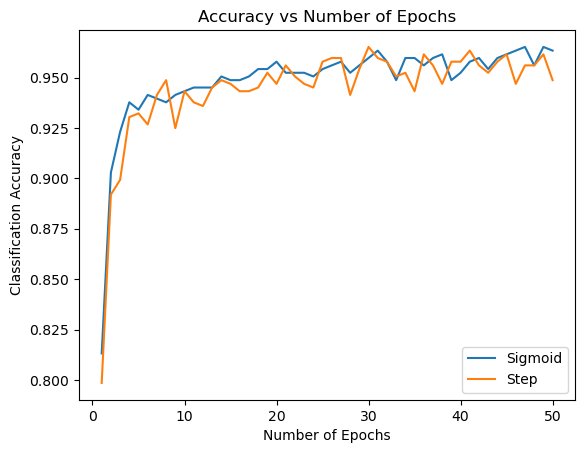

In [21]:
# Accuracy vs Epochs
plt.plot(np.arange(1, len(cancer_acc)+1), cancer_acc, label = "Sigmoid")
plt.plot(np.arange(1, len(cancer_acc_b)+1), cancer_acc_b, label = "Step")
plt.xlabel("Number of Epochs")
plt.ylabel("Classification Accuracy")
plt.title("Accuracy vs Number of Epochs")
plt.legend()
plt.show()

The difference in stability of the results in terms of accuracy is minimal. Both activation functions produce similar results.

## Applying the trained perceptron on validation data

Only sigmoid activation function was used in this part as it was deemed to produce similar, but slightly more stable results compared to the step activation function.

### Iris dataset

In [23]:
# Iris validation loss and accuracy using sigmoid function
loss_iris = []
accuracy_iris = []
for i in range(1, 51):
    iris_weights, iris_train_result, iris_loss, iris_acc = train(iris_train_x, iris_train_y, 0.1, i, "sigmoid")
    iris_result = test(iris_test_x, iris_weights, "sigmoid")
    loss_iris.append(loss(iris_result, iris_test_y))
    accuracy_iris.append(accuracy(iris_result, iris_test_y))

In [24]:
print(max(accuracy_iris))
print(accuracy_iris.index(max(accuracy_iris)))
print(min(loss_iris))
print(loss_iris.index(min(loss_iris)))

1.0
41
0.3995059780844085
49


All values of the iris validation dataset were classified correctly after 42 epochs.

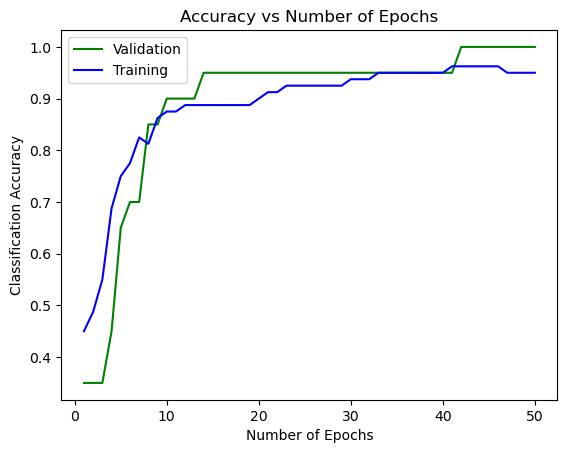

In [25]:
# Accuracy vs epochs
plt.plot(np.arange(1, len(accuracy_iris)+1), accuracy_iris, color="green", label="Validation")
plt.plot(np.arange(1, len(iris_acc)+1), iris_acc, color="blue", label="Training")
plt.xlabel("Number of Epochs")
plt.ylabel("Classification Accuracy")
plt.title("Accuracy vs Number of Epochs")
plt.legend()
plt.show()

Perceptron resulted in similar classification accuracy for both training and validation datasets over all epochs.

### Breast Cancer dataset

In [26]:
# Accuracy and loss using sigmoid function
loss_cancer = []
accuracy_cancer = []
for i in range(1, 51):
    cancer_weights, cancer_train_result, cancer_loss, cancer_acc = train(cancer_train_x, cancer_train_y, 0.01, i, "sigmoid")
    cancer_result = test(cancer_test_x, cancer_weights, "sigmoid")
    loss_cancer.append(loss(cancer_result, cancer_test_y))
    accuracy_cancer.append(accuracy(cancer_result, cancer_test_y))

In [27]:
print(max(accuracy_cancer))
print(accuracy_cancer.index(max(accuracy_cancer)))
print(min(loss_cancer))
print(loss_cancer.index(min(loss_cancer)))

0.9854014598540146
17
3.129750558132806
49


Best accuracy for breast cancer validation dataset was achieved after 18 epochs.

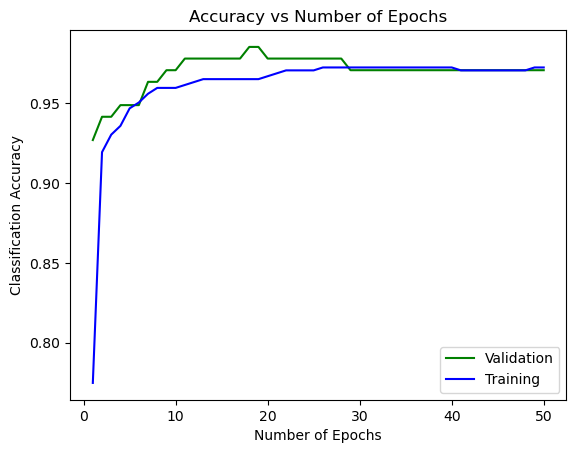

In [28]:
# Accuracy vs Epochs
plt.plot(np.arange(1, len(accuracy_cancer)+1), accuracy_cancer, color="green", label="Validation")
plt.plot(np.arange(1, len(cancer_acc)+1), cancer_acc, color="blue", label="Training")
plt.xlabel("Number of Epochs")
plt.ylabel("Classification Accuracy")
plt.title("Accuracy vs Number of Epochs")
plt.legend()

The accuracy for validation dataset starts to slightly drop after around 20 epochs which suggests that the training process should be stopped there.

## Conclusions

- Sigmoid activation function produced more stable accuracy and loss values over the epochs for both datasets. The difference was especially clear for Iris dataset.
- Very good classification accuracy was achieved for both datasets.
- Best accuracy for breast cancer dataset was achieved slightly faster (after lower number of epochs).
- It would be of great benefit to investigate how learning rate affects the classification results.